# Programmer
# Miralireza Nabavi

In [1]:
### import

### basic 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

import seaborn as sns; sns.set()
%matplotlib inline

##sklearn learners
from sklearn.tree import DecisionTreeRegressor 

##sklearn metrics
from sklearn.metrics import mean_squared_error

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

## to visualize a tree
import pydotplus
from sklearn import tree
import os

In [2]:
### read in boston data (this data is also in sklearn.datasets)
bd = pd.read_csv("Boston.csv")

xpdf = bd.iloc[:,[7,12]] #just use dis and lstat
x = xpdf.to_numpy()
y = bd['medv'].to_numpy()

## no need to standardize x's !!!!!!!!!!!!!!!!!!!!!!!

In [3]:
bd.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
bd.shape

(506, 14)

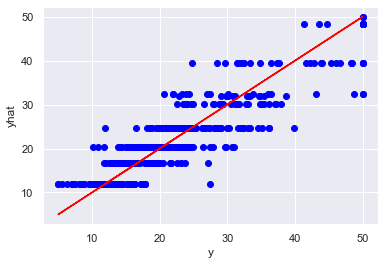

number of bottom  nodes:  10


In [5]:
### simple decision tree

# tree with at most 10 bottom nodes
tmod = DecisionTreeRegressor(max_leaf_nodes=10) # Let's do GridSearchCV for this parameter in future
tmod.fit(x,y)

## look at in-sample fits
yhat = tmod.predict(x)

plt.scatter(y,yhat,c='blue')
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(y,y,c='red')
plt.show()
print("number of bottom  nodes: ",pd.Series(yhat).nunique())

In [6]:
### variable importance
## we only have two variables, but for future reference note the variable importance 
varimp = tmod.feature_importances_
print('variable importances:',varimp)
print(pd.Series(tmod.feature_importances_,index=xpdf.columns.values))

variable importances: [0.11369511 0.88630489]
dis      0.113695
lstat    0.886305
dtype: float64


In [7]:
#dir(tmod)

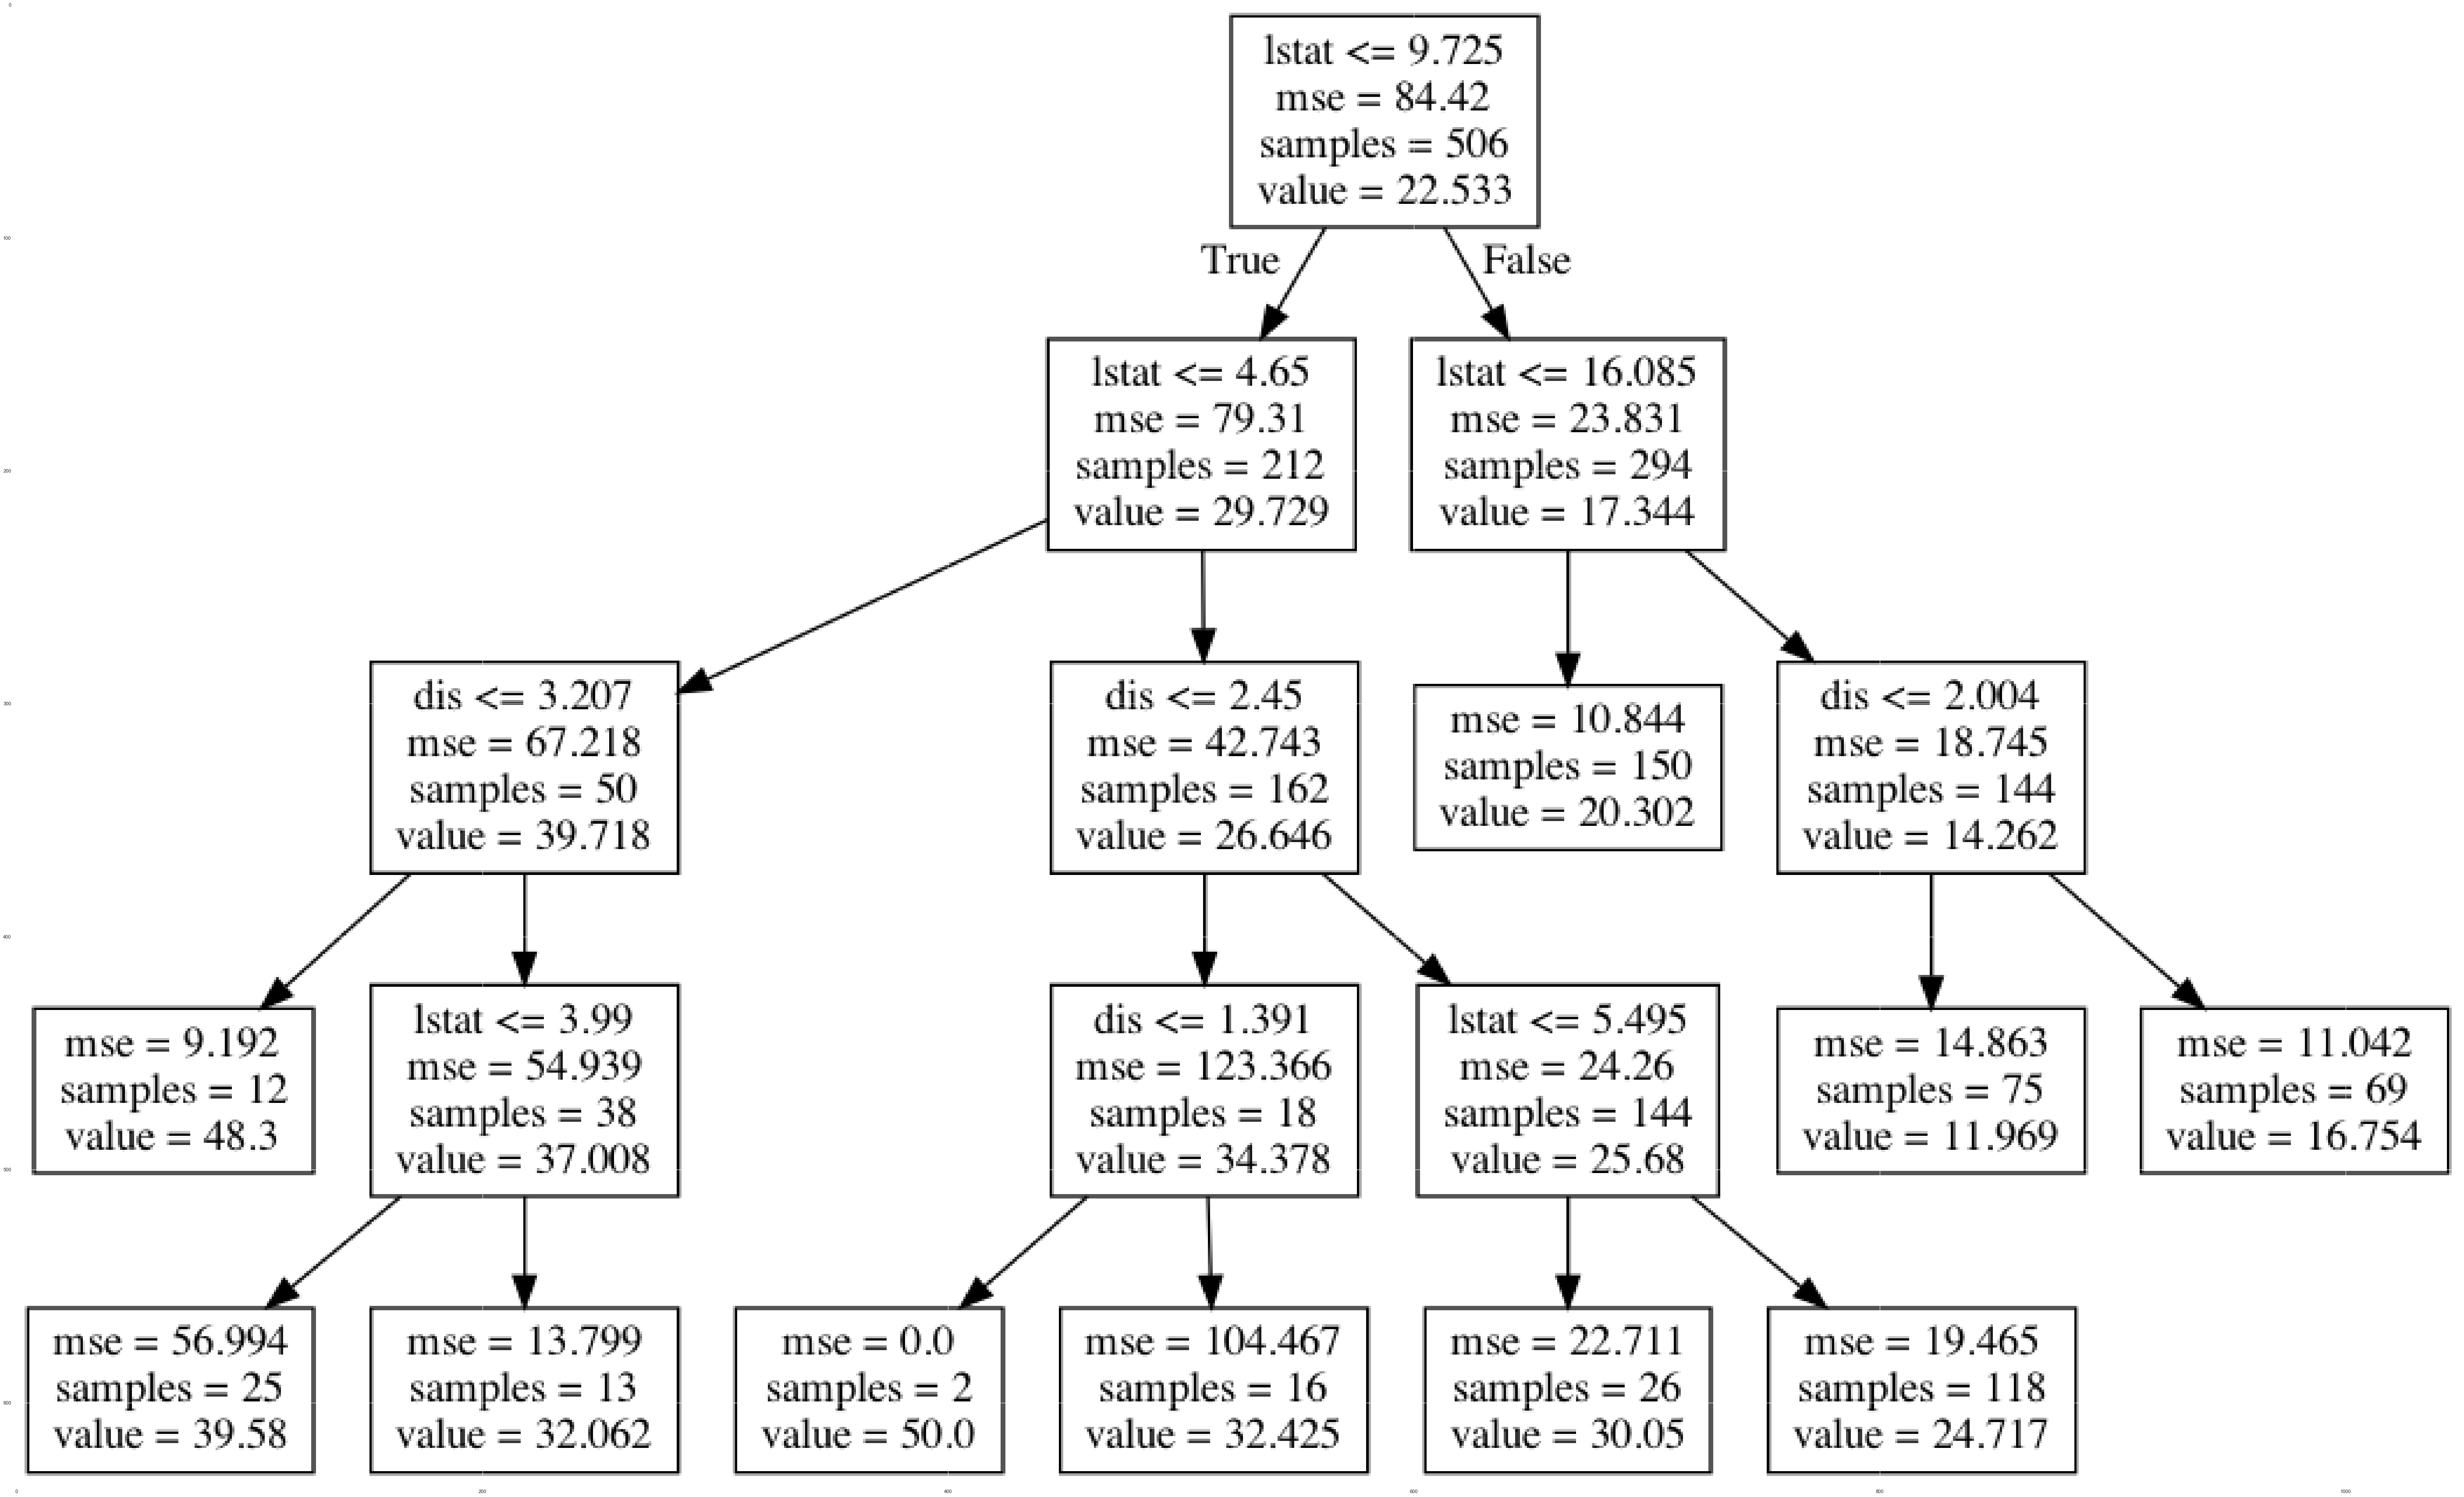

In [8]:
### plot a tree
### this seems a bit cludgy but the below worked on my linux system.
import matplotlib.image as mpimg

dot_data = tree.export_graphviz(tmod,out_file=None,feature_names=xpdf.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png") #write graph to file
## the picture is now in the file tree.png
os.system('eog tree.png') #display file from python command line, unix command eog
img = mpimg.imread("tree.png")
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')